In [1]:
# Import Libraries and Dependencies
from vilib.matrix_games.base import mg_problem
from vilib.matrix_games.generate import*
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import numpy.linalg as LA
from solvers import *

In [2]:
dimN = 3000
dimM = 3000
proximal_name = "simplex"

prob = mg_problem("rand", proximal_name, (dimN, dimM), "plusuniform")
#filepaths = ["test.h5", "testT.h5", False]
#prob = mg_problem("harddisk", proximal_name, (dimN, dimM))
F_mg, J_mg, prox_g_mg = prob.get_parameters()

In [6]:
N = 10000
repeat = 1
# starting point
q0 = prox_g_mg(np.ones(dimN + dimM),1)

In [4]:
show_out = False
ans0 = np.zeros(N+1)
for i in range(repeat):
    temp = adaptive_graal(J_mg, F_mg, prox_g_mg, q0, N, phi=1.5, output=show_out)
    ans0 += np.array(temp[0])
ans0/repeat

KeyboardInterrupt: 

In [7]:
show_out = False
ans1 = np.zeros(N+1)
for i in range(repeat):
    temp = extra_gradient_method(J_mg, F_mg, prox_g_mg, q0, N, show_out)
    ans1 += np.array(temp[0])
ans1/repeat

CPU time for Extra Gradient: 718.7201969


array([0.69526768, 0.69225472, 0.68827675, ..., 0.00438906, 0.00439363,
       0.00439769])

In [18]:
ans2 = np.zeros(N+1)
for i in range(repeat):
    temp = tseng_fbf_linesearch(J_mg, F_mg, prox_g_mg, q0, 2, N)
    ans2 += np.array(temp[0])
ans2/repeat

CPU time for FBF: 1540.5362295000004


array([8.03268913e-01, 7.22313930e-01, 5.36816593e-01, ...,
       1.81760014e-05, 1.58511607e-05, 2.01265880e-05])

Text(0, 0.5, 'residual')

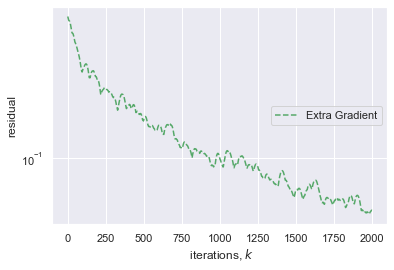

In [5]:
import seaborn as sns
sns.set()
plt.plot(ans1, '--g', label='Extra Gradient')
plt.plot(ans0, '--b', label='aGraal')
plt.plot(ans2, '--r', label='Tseng Linesearch')

plt.legend(loc="center right")

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')

#plt.savefig('Images/300allsimplexplus.png', bbox_inches='tight')

In [21]:
#np.savetxt('3000ans0.txt', ans0)
#np.savetxt('3000ans1.txt', ans1)
#np.savetxt('3000ans2.txt', ans2)

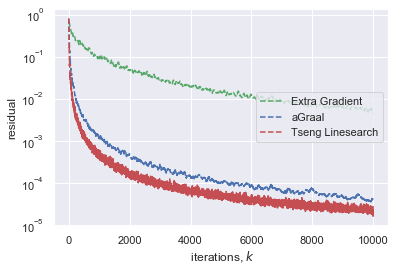

In [9]:
plt.plot(ans1, '--g', label='Extra Gradient')
b = np.loadtxt('3000ans0.txt')
plt.plot(b, '--b', label='aGraal')
b = np.loadtxt('3000ans2.txt')
plt.plot(b, '--r', label='Tseng Linesearch')

plt.legend(loc="center right")

plt.yscale('log')

plt.xlabel(u' iterations, $k$')
plt.ylabel(u'residual')
plt.savefig('Images/3000allsimplexplus.png', bbox_inches='tight')